In [1]:
import pandas as pd

In [4]:
adidas_df = pd.read_csv("Adidas Old Us Sales.csv")
adidas_df.head()

,sales_id,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method
0,1,Foot Locker,1185732,11/6/2021,Southeast,South Carolina,Charleston,Men's Street Footwear,50,278,13900,792,Online
1,2,Foot Locker,1185732,3/14/2020,Northeast,New York,New York,Men's Apparel,46,278,12788,435,Outlet
2,3,West Gear,1128299,1/19/2021,West,California,San Francisco,Men's Athletic Footwear,47,278,13066,287,Outlet
3,4,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,103,218,22454,1257,Online
4,5,Sports Direct,1197831,9/14/2021,South,Alabama,Birmingham,Women's Street Footwear,36,278,10008,530,Outlet


### Adidas US Sales Analsis- Exploratory Data Analysis(EDA) Report
#### Date: 3 March 2025
#### Analyst: Promise Emefile

This report  present the findings from the Exploratory Data Analysis(EDA) on Adidas US sales data.
The objective was to identify Sales Trends,Regional Performance and Top Selling Products to support
strategic decision-making.

The dataset includes Adidas sales records across various regions,states,retailers,product categories,
and sales methods.

FINDING: The West region led in total sales, followed by Northeast and Southeast.


Total Sales by Region:

West:  $36.3M

Northeast: $25.0M

Southeast: $21.3M

South:  $20.5M

Midwest: $16.6M

Recommendation: Adidas should allocate more resources (marketing, inventory) to the West, as it is the most profitable region.

Top-Selling Products

💡 Finding: Men’s Street Footwear was the best-selling product, followed closely by Women’s Apparel and Men’s Athletic Footwear.

🛍 Top 3 Best-Selling Products:

⿡ Men’s Street Footwear – $27.6M in sales

⿢ Women’s Apparel – $23.8M in sales

⿣ Men’s Athletic Footwear – $20.5M in sales

Recommendation: Adidas should focus on expanding its lifestyle and streetwear lines, as they drive the highest revenue.

Sales Distribution by Method

💡 Finding: Online sales (37.47%) exceeded outlet store sales (32.81%), confirming a strong shift toward e-commerce.

📈 Sales Breakdown by Method:
	•	Online: 37.47%
	•	Outlet Stores: 32.81%

Recommendation: Adidas should increase digital marketing efforts and enhance online shopping experiences (better UI, targeted ads, discounts).

Monthly Sales Trends

💡 Finding: Sales peaked in July to December 2021, likely due to summer promotions and December seasonal shopping trends.

📊 Sales Peaks:
	•	July 2021: $10.36M
	•	December 2021: $10.33m

Recommendation: Adidas should plan major promotional campaigns around these peak months to maximize revenue.

### Data Cleaning and Preprocessing

In [8]:
#Checking for missing values
missing_column = adidas_df.isnull().sum()
print(missing_column)

sales_id            0
retailer            0
retailer_id         0
invoice_date        0
region              0
state               0
city                0
product             0
price_per_unit      0
units_sold          0
total_sales         0
operating_profit    0
sales_method        0
dtype: int64


In [14]:
#Check for Incorrect data type
data_type = adidas_df.dtypes

In [73]:
#converting invoice_date column to datetime format
adidas_df["invoice_date"] = pd.to_datetime(adidas_df["invoice_date"])
print(adidas_df)
print(data_type)

      sales_id       retailer  retailer_id invoice_date     region  \
0            1    Foot Locker      1185732   2021-11-06  Southeast   
1            2    Foot Locker      1185732   2020-03-14  Northeast   
2            3      West Gear      1128299   2021-01-19       West   
3            4        Walmart      1128299   2021-06-17  Southeast   
4            5  Sports Direct      1197831   2021-09-14      South   
...        ...            ...          ...          ...        ...   
9632      9633         Amazon      1185732   2021-11-18  Northeast   
9633      9634         Amazon      1185732   2021-10-22       West   
9634      9635         Amazon      1185732   2021-10-22       West   
9635      9636      West Gear      1185732   2021-04-10    Midwest   
9636      9637  Sports Direct      1185732   2021-10-05  Northeast   

               state           city                    product  \
0     South Carolina     Charleston      Men's Street Footwear   
1           New York       

In [18]:
#check for duplicate values
duplicate_df = adidas_df.duplicated().sum()
print(duplicate_df)

0


### Statistical Analysis
Analyze key statistics for numeric columns

In [19]:
#statistics Summary
print(adidas_df.describe())

          sales_id   retailer_id                   invoice_date  \
count  9637.000000  9.637000e+03                           9637   
mean   4819.000000  1.173846e+06  2021-05-10 16:52:11.929023232   
min       1.000000  1.128299e+06            2020-01-01 00:00:00   
25%    2410.000000  1.185732e+06            2021-02-17 00:00:00   
50%    4819.000000  1.185732e+06            2021-06-04 00:00:00   
75%    7228.000000  1.185732e+06            2021-09-16 00:00:00   
max    9637.000000  1.197831e+06            2021-12-31 00:00:00   
std    2782.106606  2.636304e+04                            NaN   

       price_per_unit   units_sold   total_sales  operating_profit  
count     9637.000000  9637.000000   9637.000000       9637.000000  
mean        45.218948   256.886064  12451.621355       3440.706029  
min          7.000000     6.000000    160.000000          8.000000  
25%         35.000000   106.000000   4068.000000        192.000000  
50%         45.000000   176.000000   7805.000000   

In [21]:
#Unique values in categorical columns
for col in ['retailer', 'region', 'state', 'city', 'product', 'sales_method']:
    print(f"Unique values in {col}:", adidas_df[col].nunique())

Unique values in retailer: 6
Unique values in region: 5
Unique values in state: 50
Unique values in city: 52
Unique values in product: 6
Unique values in sales_method: 3


### Sales Trends Analysis
checking how sales are distributed across different dimensions.

In [23]:
# Total Sales By region
region_sales = adidas_df.groupby("region")["total_sales"].sum().sort_values(ascending = False)
print(region_sales)

region
West         36344407
Northeast    25078267
Southeast    21374436
South        20544731
Midwest      16654434
Name: total_sales, dtype: int64


<Axes: title={'center': 'Total Sales By Region'}, xlabel='region', ylabel='Total Amount(in millions)'>

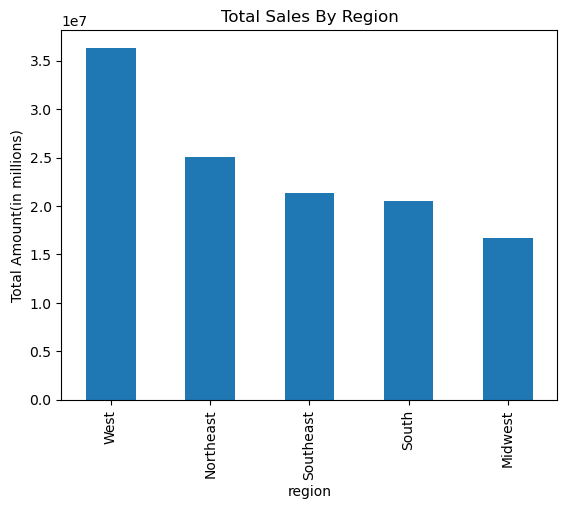

In [42]:
import matplotlib.pyplot as plt
region_sales.plot(kind = 'bar', xlabel = 'region', ylabel = "Total Amount(in millions)", title = "Total Sales By Region")

In [28]:
# Best Selling Product
Top_products = adidas_df.groupby("product")["total_sales"].sum().sort_values(ascending = False)
print(Top_products)

product
Men's Street Footwear        27680769
Women's Apparel              23814985
Men's Athletic Footwear      20532180
Women's Street Footwear      17171938
Men's Apparel                16484882
Women's Athletic Footwear    14311521
Name: total_sales, dtype: int64


<Axes: title={'center': 'Best Selling Products'}, xlabel='Products', ylabel='Total Sales(In Millions)'>

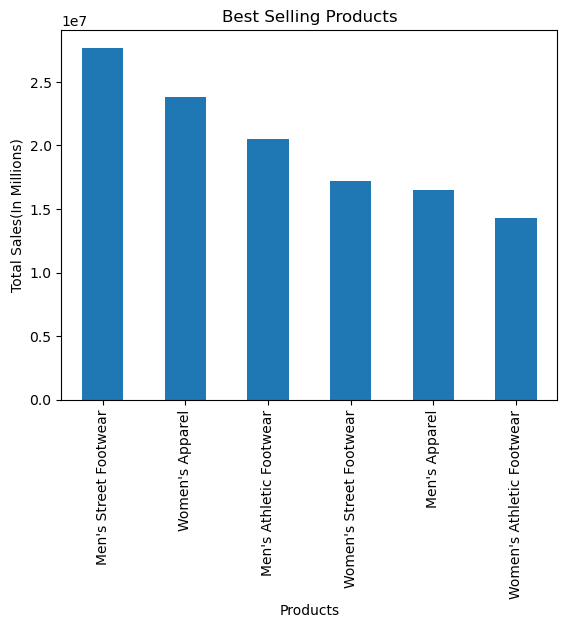

In [43]:
Top_products.plot(kind ="bar", xlabel = "Products", ylabel ="Total Sales(In Millions)", title = "Best Selling Products")

In [77]:
# Sales Trend Over Time
#aggregate sales by month
adidas_df['month'] = adidas_df['invoice_date'].dt.to_period('M')
monthly_sales = adidas_df.groupby("month")["total_sales"].sum().sort_values(ascending = False)
print(monthly_sales)

month
2021-07    10368031
2021-12    10336130
2021-08     9651596
2021-06     8698953
2021-05     8576956
2021-09     8037898
2021-11     7855390
2021-01     7396271
2021-10     7110189
2021-04     6498339
2021-02     6123040
2021-03     5220782
2020-04     3193081
2020-08     2606630
2020-03     2474202
2020-09     2367686
2020-01     2312746
2020-05     2164764
2020-07     2158763
2020-02     2140813
2020-10     1428569
2020-11     1168050
2020-06     1084194
2020-12     1023202
Freq: M, Name: total_sales, dtype: int64


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month', ylabel='Total sales(in Millions)'>

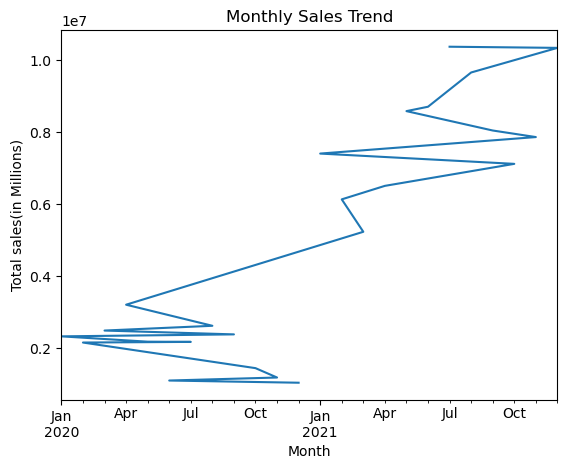

In [78]:
monthly_sales.plot(kind="line", xlabel = "Month", ylabel = "Total sales(in Millions)", title = "Monthly Sales Trend")

In [74]:
#Sales Distribution By Method
SalesMethod = adidas_df.groupby('sales_method')["total_sales"].sum()/ adidas_df["total_sales"].sum() * 100
SalesMethod = str(round(SalesMethod, 2))
print(SalesMethod)

sales_method
In-store    29.72
Online      37.47
Outlet      32.81
Name: total_sales, dtype: float64
